<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module2_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [3]:
bre_data = load_breast_cancer().data
print("Features:", bre_data.shape)

bre_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", bre_labels.shape)

Features: (569, 30)
Target: (569, 1)


In [4]:
final_data = np.concatenate([bre_data, bre_labels],axis=1)
data = pd.DataFrame(final_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
data.columns = features_labels
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [26]:
X = data.iloc[:,:30].values
y = data.iloc[:,30].values

print(np.shape(X))
print(np.shape(y))

(569, 30)
(569,)


### 1. Standardization of the data

In [27]:
from sklearn.preprocessing import StandardScaler
X_st = StandardScaler().fit_transform(X)

print(np.std(X_st))

1.0


In [28]:
X_stdf = pd.DataFrame(X_st)
X_stdf.columns = features
X_stdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 2.Computing the covariance matrix

In [17]:
from numpy.core.fromnumeric import shape
mean_v= np.mean(X_st, axis=0)

covariance_matrix = 1/ (X_st.shape[0]-1) * (X_st- mean_v).T.dot(X_st - mean_v)

print("Covariance matrix of first 10 rows and columns:")
print(covariance_matrix[0:10, 0:10])
print(covariance_matrix.shape)

Covariance matrix of first 10 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151  0.50701464
   0.67795504  0.82397664  0.14800135 -0.31217947]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969  0.23711895
   0.30295025  0.29398071  0.07152669 -0.07657176]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309  0.55791673
   0.71739645  0.85247524  0.18334944 -0.26193725]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005  0.49937933
   0.68719054  0.82471829  0.15155944 -0.28360824]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056  0.66028364
   0.52290275  0.55466999  0.55875679  0.58582157]
 [ 0.50701464  0.23711895  0.55791673  0.49937933  0.66028364  1.00176056
   0.88467546  0.83259831  0.60370204  0.56636403]
 [ 0.67795504  0.30295025  0.71739645  0.68719054  0.52290275  0.88467546
   1.00176056  0.92301319  0.50154807  0.33737629]
 [ 0.82397664  0.29398071  0.85247524  0.82471829  0.55466999  0.83259831
   

In [18]:
covmat_num = np.cov(X_st.T)

print("Covariance matrix first 6 rows and columns:")
print(covmat_num[0:6, 0:6])

Covariance matrix first 6 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151  0.50701464]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969  0.23711895]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309  0.55791673]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005  0.49937933]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056  0.66028364]
 [ 0.50701464  0.23711895  0.55791673  0.49937933  0.66028364  1.00176056]]


### 3. Calculating the eigenvectors and eigenvalues

In [20]:
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
print(eig_values.shape)
print(eig_vectors.shape)

(30,)
(30, 30)


### 4. Computing the Principal Components

Explained variance:
[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797189875980173, 0.870537900737884, 0.8045249871967302, 0.5233657454926353, 0.31378321676273985, 0.26620933651523176, 0.19799679253242683, 0.17539594502263636, 0.1649253059225157, 0.10386467483387138, 0.0999096463700257, 0.09146467510543423, 0.08113612588991044, 0.06018335666716721, 0.05160423791652017, 0.02725879954774855, 0.0230015462505957, 0.005297792903809204, 0.0024960103246895395, 0.00044348274273613787]
Cumulative variance:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  

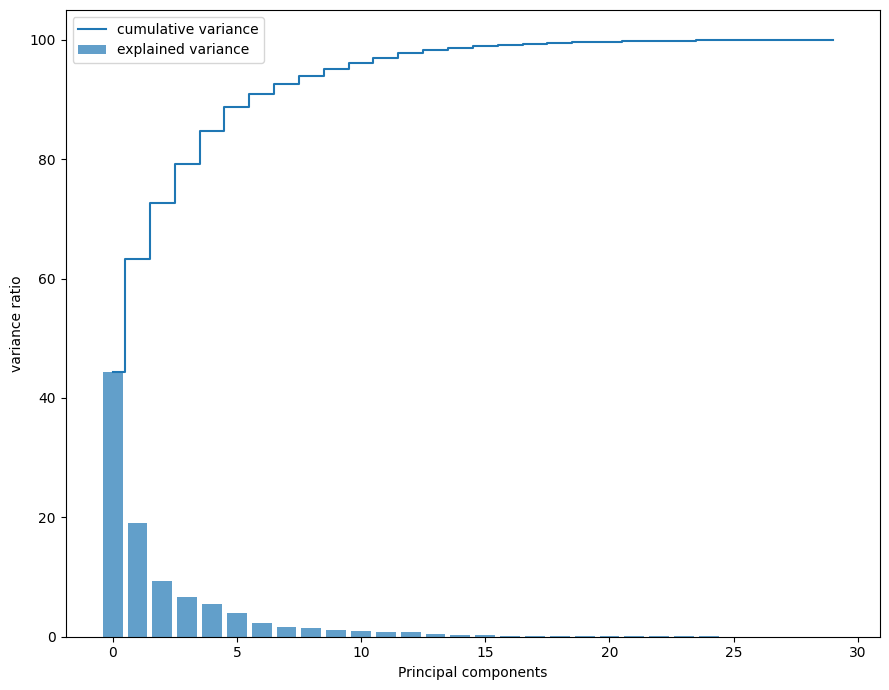

In [22]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_values)
var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var = np.cumsum(var_exp)
print("Cumulative variance:")
print(cum_var)

plt.figure(figsize=(9 , 7))
plt.bar(range(30), var_exp, alpha=0.7, align='center', label='explained variance')
plt.step(range(30), cum_var, where='mid', label='cumulative variance')
plt.ylabel('variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

5.Reducing the dimensions of the data set

In [29]:
mat_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_st.dot(mat_w)
print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Y_de = pca.fit_transform(X_st)

print(Y_de)

[[ 9.19283678  1.94858353 -1.12316453]
 [ 2.38780173 -3.76817102 -0.52929185]
 [ 5.73389628 -1.07517373 -0.5517476 ]
 ...
 [ 1.25617931 -1.90229703  0.56272979]
 [10.37479409  1.67200979 -1.87703001]
 [-5.47524339 -0.67063587  1.49044507]]


In [32]:
df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])
for i in range(len(Y)):
    dic = dict()

    dic["PC1"] = Y[i, 0]
    dic["PC2"] = Y[i, 1]
    dic["PC3"] = Y[i, 2]
    if (int(bre_labels[i][0]) == 0):
      dic["Label"] = "Benign"
    else:
      dic["Label"] = "Malignant"

    df = pd.concat([df, pd.DataFrame([dic])], ignore_index=True)
df.head()

,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


In [35]:
import plotly.graph_objects as go
import plotly.express as px
r_x = df.PC1.tolist()
r_y = df.PC2.tolist()
for_label = df.Label.tolist()
for_h = df.Label.tolist()
fig = px.scatter(x=r_x, y=r_y, color=for_label,
                 title="PCA",
                 color_discrete_map={"Benign": "red", "Malignant": "green"})
fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=10,))
fig.show(renderer = "colab")

In [36]:
for_x = df.PC2.tolist()
for_y = df.PC3.tolist()
for_label = df.Label.tolist()
for_h = df.Label.tolist()
fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC3', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#444444',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Red"))
fig.update_traces(marker=dict(size=10,))

fig.show(renderer = "colab")

In [56]:
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',color='Label',title="PCA")
fig.update_traces(marker=dict(size=12,))
fig.show(renderer = "colab")

For 4 dimensions

In [44]:
mat_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1),
                      eig_pairs[3][1].reshape(30,1)))

Y = X_st.dot(mat_w)
print(Y)

[[ 9.19283683  1.94858307 -1.12316616  3.6337309 ]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702]
 [10.37479406  1.67201011 -1.87702933 -2.35603113]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714]]


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
Y_de = pca.fit_transform(X_st)

print(Y_de)

[[ 9.19283683  1.94858326 -1.12316719  3.63371249]
 [ 2.3878018  -3.76817185 -0.52929249  1.11826823]
 [ 5.73389628 -1.07517378 -0.55174736  0.91208573]
 ...
 [ 1.25617928 -1.90229677  0.56273084 -2.08922169]
 [10.37479406  1.67201006 -1.87702895 -2.35602532]
 [-5.4752433  -0.6706366   1.49044248 -2.2991684 ]]


In [46]:
df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "PC4","Label"])
for i in range(len(Y)):
    dic = dict()

    dic["PC1"] = Y[i, 0]
    dic["PC2"] = Y[i, 1]
    dic["PC3"] = Y[i, 2]
    dic['PC4'] = Y[i, 3]
    if (int(bre_labels[i][0]) == 0):
      dic["Label"] = "Benign"
    else:
      dic["Label"] = "Malignant"

    df = pd.concat([df, pd.DataFrame([dic])], ignore_index=True)
df.head()

,PC1,PC2,PC3,PC4,Label
0,9.192837,1.948583,-1.123166,3.633731,Benign
1,2.387802,-3.768172,-0.529293,1.118264,Benign
2,5.733896,-1.075174,-0.551748,0.912083,Benign
3,7.122953,10.275589,-3.232790,0.152547,Benign
4,3.935302,-1.948072,1.389767,2.940639,Benign


In [62]:
import plotly.express as px

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='PC4',title="PCA")
fig.show(renderer="colab")
